In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
surv = df.groupby(["Survived", "Sex"]).count()
surv.reset_index()

,Survived,Sex,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,female,81,81,81,64,81,81,81,81,6,81
1,0,male,468,468,468,360,468,468,468,468,62,468
2,1,female,233,233,233,197,233,233,233,233,91,231
3,1,male,109,109,109,93,109,109,109,109,45,109


<Axes: xlabel='Survived', ylabel='PassengerId'>

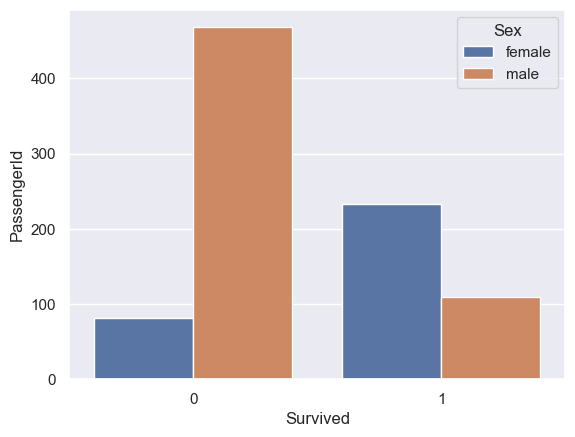

In [7]:
sns.barplot(data=surv, x='Survived', y='PassengerId', hue='Sex')

<Axes: xlabel='Fare', ylabel='Count'>

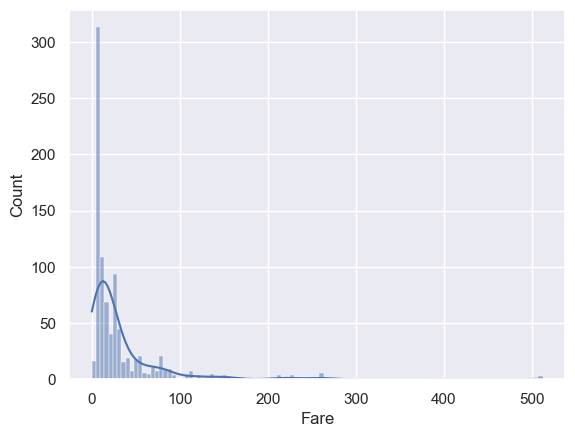

In [8]:
sns.histplot(df.Fare, kde = True)

<Axes: xlabel='Age', ylabel='Count'>

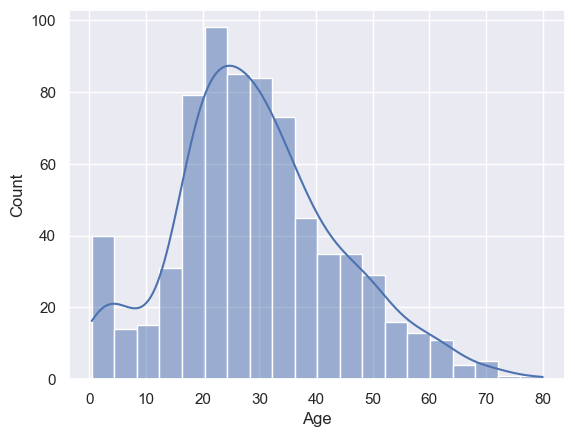

In [9]:
sns.histplot(x = df.Age, kde= True)

<Axes: >

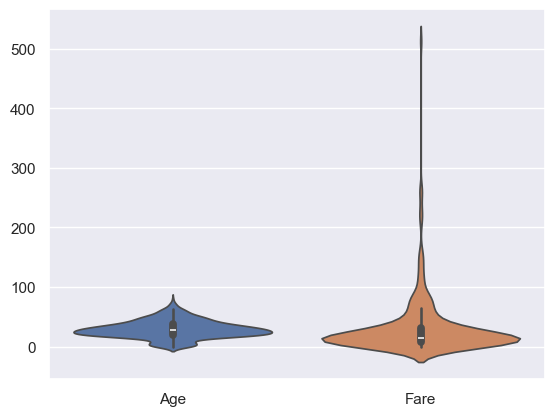

In [10]:
sns.violinplot(df[["Age", "Fare"]])

In [11]:
df["Rich"] = df["Fare"].map(lambda x: 1 if x > 100 else 0)

In [12]:
pd.pivot_table(df, index= "Survived", columns= "Rich", values="PassengerId", aggfunc="count")

Rich,0,1
Survived,,
0,535,14
1,303,39


In [13]:
for i in range(0, 100, 10):
    df["Rich"] = df["Fare"].map(lambda x: 1 if x > i else 0)
    pv = pd.pivot_table(df, index = "Survived", columns="Rich", values="PassengerId", aggfunc="count")
    print(f"For fare higher than {i}")
    print()
    print(pv)
    print()

For fare higher than 0

Rich       0    1
Survived         
0         14  535
1          1  341

For fare higher than 10

Rich        0    1
Survived          
0         269  280
1          67  275

For fare higher than 20

Rich        0    1
Survived          
0         372  177
1         143  199

For fare higher than 30

Rich        0    1
Survived          
0         451   98
1         206  136

For fare higher than 40

Rich        0    1
Survived          
0         486   63
1         229  113

For fare higher than 50

Rich        0    1
Survived          
0         498   51
1         233  109

For fare higher than 60

Rich        0   1
Survived         
0         509  40
1         260  82

For fare higher than 70

Rich        0   1
Survived         
0         520  29
1         266  76

For fare higher than 80

Rich        0   1
Survived         
0         532  17
1         285  57

For fare higher than 90

Rich        0   1
Survived         
0         535  14
1         299  43



In [14]:
df["Rich"] = df["Fare"].map(lambda x: 1 if x > 80 else 0)

In [15]:
df_rich = df[df["Fare"] > 50]
df_rich.Survived.value_counts()

Survived
1    109
0     51
Name: count, dtype: int64

In [16]:

cnts = df["Pclass"].value_counts()
cnts.values

array([491, 216, 184], dtype=int64)

<Axes: title={'center': 'Ticket class'}, xlabel='Pclass'>

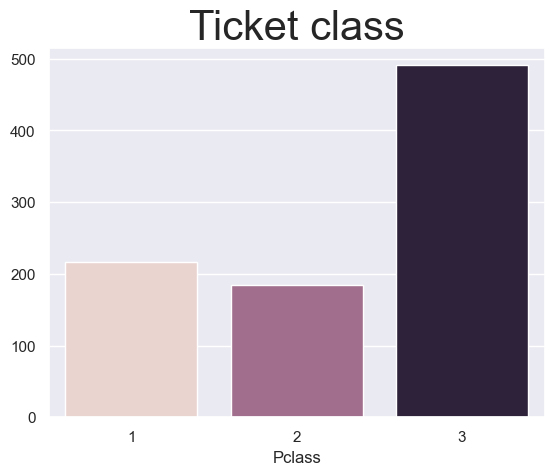

In [17]:
plt.title("Ticket class", fontsize = 30)
sns.barplot(x = cnts.index, y = cnts.values, hue= cnts.index, legend=False)

In [18]:
pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Name' ,aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [19]:
pd.pivot_table(df, index = "Survived", columns= "Pclass", values="PassengerId", aggfunc="count")

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [20]:
pd.pivot_table(df, index= "Survived", columns="Embarked", values="PassengerId", aggfunc="count")

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [21]:
df = df.drop(columns=["Embarked"])

In [22]:
df["Old"] = df["Age"].map(lambda x: 1 if x > 40 else 0)

In [23]:
pd.pivot_table(df, index = "Survived", columns= "Old", values="PassengerId", aggfunc="count")

Old,0,1
Survived,,
0,454,95
1,287,55


In [24]:
df = df.drop(columns= ["Age", "Name", "Old"])

In [25]:
df.value_counts(["Ticket"])

Ticket  
1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
345572      1
345364      1
343276      1
343275      1
347464      1
Name: count, Length: 681, dtype: int64

In [26]:
df = df.drop(columns=["Ticket"])
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Rich
0,1,0,3,male,1,0,7.2500,NaN,0
1,2,1,1,female,1,0,71.2833,C85,0
2,3,1,3,female,0,0,7.9250,NaN,0
3,4,1,1,female,1,0,53.1000,C123,0
4,5,0,3,male,0,0,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,NaN,0
887,888,1,1,female,0,0,30.0000,B42,0
888,889,0,3,female,1,2,23.4500,NaN,0
889,890,1,1,male,0,0,30.0000,C148,0


In [27]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [28]:
df = df.drop(columns=["Cabin"])

In [29]:
pd.pivot_table(df, index= "Survived", columns="SibSp", values="PassengerId", aggfunc="count")

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


In [30]:
pd.pivot_table(df, index= "Survived", columns="Parch", values="PassengerId", aggfunc="count")

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


In [31]:
df = df.drop(columns="PassengerId")

In [32]:
df["Sex"] = df["Sex"].map(lambda x: 0 if x == "female" else 1)

<Axes: >

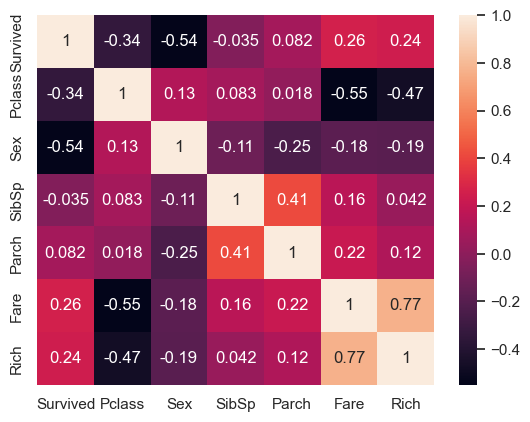

In [33]:
sns.heatmap(df.corr(), annot= True)

In [34]:
df = df.drop(columns= ["Fare"])

In [35]:
df

,Survived,Pclass,Sex,SibSp,Parch,Rich
0,0,3,1,1,0,0
1,1,1,0,1,0,0
2,1,3,0,0,0,0
3,1,1,0,1,0,0
4,0,3,1,0,0,0
...,...,...,...,...,...,...
886,0,2,1,0,0,0
887,1,1,0,0,0,0
888,0,3,0,1,2,0
889,1,1,1,0,0,0


In [36]:
x = df.drop(columns=["Survived"])
y = df["Survived"]

In [37]:
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [38]:
testing_df = pd.read_csv("test.csv")

In [39]:
testing_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [40]:
testing_df = testing_df.drop(columns=["Name", "Ticket", "Cabin", "Embarked"])


In [41]:
testing_df["Sex"] = testing_df["Sex"].map(lambda x: 0 if x == "female" else 1)

In [42]:
testing_df["Rich"] = testing_df["Fare"].map(lambda x: 1 if x > 80 else 0)
testing_df = testing_df.drop(columns=["Fare"])

In [43]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Rich'], dtype='object')

In [44]:
testing_df = testing_df.drop(columns=["Age"])

In [45]:
testing_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Rich'], dtype='object')

In [46]:
y_pred = model.predict(testing_df.drop(columns=["PassengerId"]))

In [47]:
final_df = pd.DataFrame({
    "PassengerId": testing_df["PassengerId"],
    "Survived": y_pred
})

In [48]:
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
final_df.to_csv("submission.csv", index=False)